In [6]:
import pandas as pd
df=pd.read_csv('./Downloads/DatasetForCoffeeSales2.csv')
df.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


In [4]:
print(df.isnull().sum()) 

Date               0
Customer_ID        0
City               0
Category           0
Product            0
Unit Price         0
Quantity           0
Sales Amount       0
Used_Discount      0
Discount_Amount    0
Final Sales        0
dtype: int64


array([[<Axes: title={'center': 'Customer_ID'}>,
        <Axes: title={'center': 'Unit Price'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Sales Amount'}>],
       [<Axes: title={'center': 'Discount_Amount'}>,
        <Axes: title={'center': 'Final Sales'}>]], dtype=object)

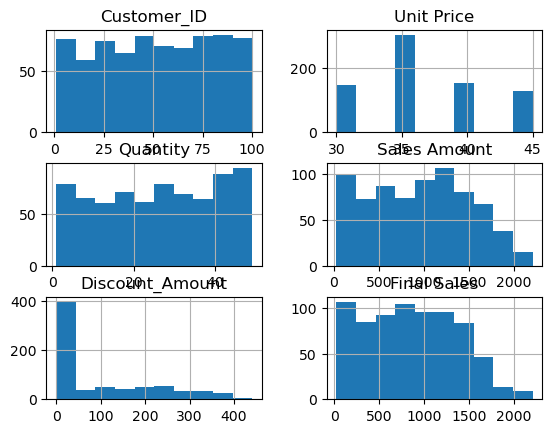

In [5]:
df.hist()

In [8]:
import matplotlib.pyplot as plt
country_sales=df.groupby("City")["Final Sales"].sum()

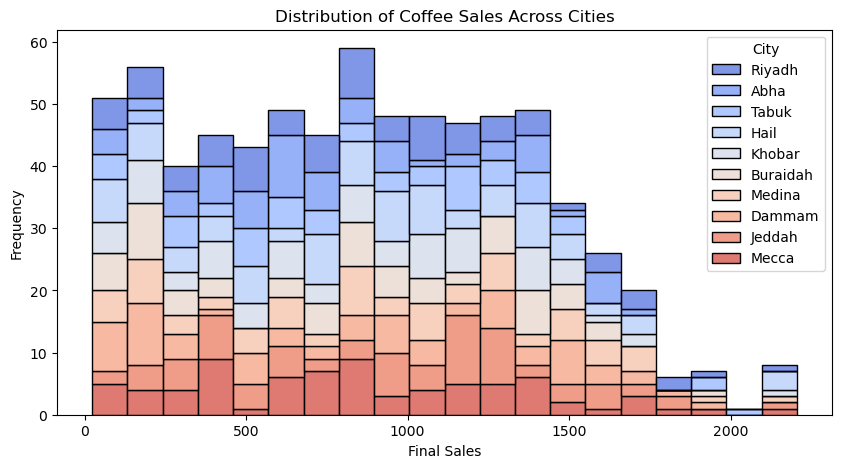

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Final Sales", hue="City", multiple="stack", bins=20, palette="coolwarm")
plt.xlabel("Final Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Coffee Sales Across Cities")
plt.show()

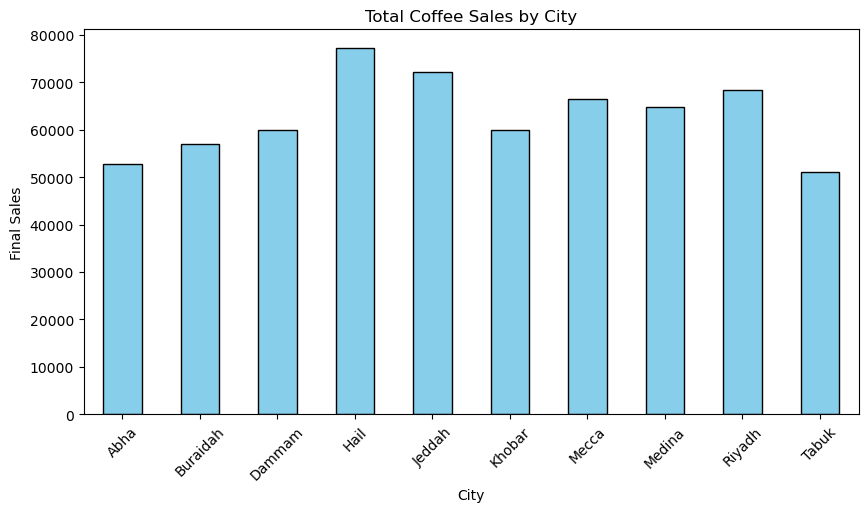

In [12]:
plt.figure(figsize=(10, 5))
country_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("City")
plt.ylabel("Final Sales")
plt.title("Total Coffee Sales by City")
plt.xticks(rotation=45)  
plt.show()

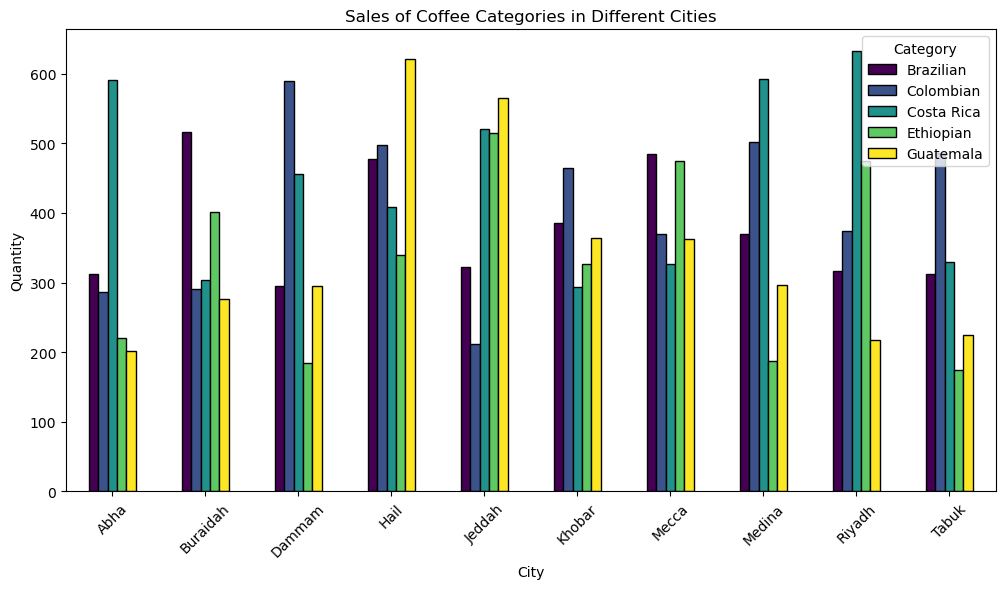

In [16]:
city_category_sales = df.groupby(["City", "Product"])["Quantity"].sum().unstack()


city_category_sales.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

plt.xlabel("City")
plt.ylabel("Quantity")
plt.title("Sales of Coffee Categories in Different Cities")
plt.xticks(rotation=45)  
plt.legend(title="Category")
plt.show()

📈 The month with the highest sales is 6 with total sales of 57208.


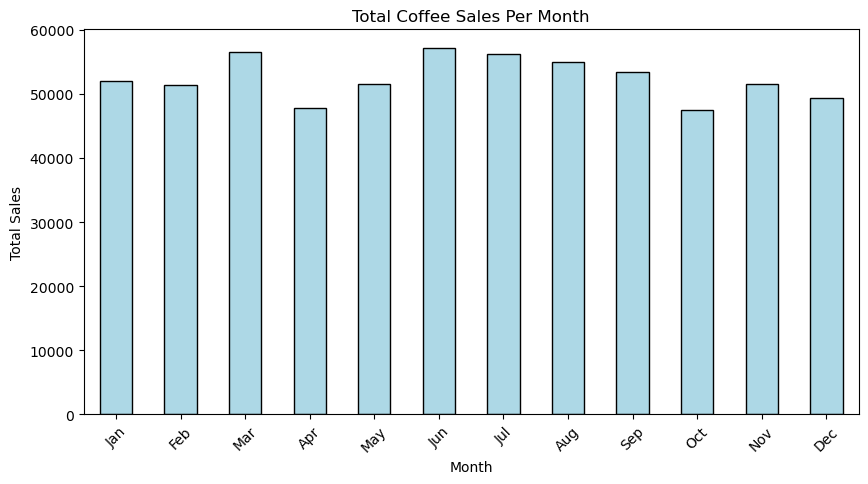

In [19]:

df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month  
monthly_sales = df.groupby("Month")["Final Sales"].sum()
best_month = monthly_sales.idxmax()
best_sales = monthly_sales.max()

print(f"📈 The month with the highest sales is {best_month} with total sales of {best_sales}.")
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind="bar", color="lightblue", edgecolor="black")

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Coffee Sales Per Month")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.show()